# 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [214]:
import numpy as np

dice = list(range(1, 7))
print(np.random.choice(dice))

4


# 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

In [215]:
c = np.random.choice(dice) # サイコロの番号
print(c)

x = np.random.normal(loc=c, scale=0.1, size=30) # x座標の正規分布
#print(x)
y = np.random.normal(loc=0, scale=0.1, size=30) # y座標の正規分布
#print(y)

xy = np.dstack([x, y]) # リスト結合
print(xy)

1
[[[ 1.09025302  0.01584118]
  [ 1.02669758 -0.11003479]
  [ 1.19625749  0.01796902]
  [ 1.07518243 -0.01400489]
  [ 1.10975916 -0.21653788]
  [ 1.05138409 -0.00200363]
  [ 0.99993709  0.09117294]
  [ 1.1104832  -0.11746766]
  [ 0.89822248 -0.21864131]
  [ 1.01307047 -0.05750166]
  [ 1.1014955   0.04671303]
  [ 0.96840383 -0.12647091]
  [ 1.01095704 -0.05417917]
  [ 0.93459049 -0.05943829]
  [ 0.91091801 -0.09276747]
  [ 0.95985545 -0.09260942]
  [ 0.99975516 -0.04621598]
  [ 0.96438216 -0.01056436]
  [ 1.03100251  0.04687183]
  [ 1.12681609 -0.01412213]
  [ 1.03616664 -0.17078292]
  [ 0.92353624  0.01184285]
  [ 1.0646365  -0.01639009]
  [ 1.02823605 -0.05366813]
  [ 1.09467799 -0.19349635]
  [ 0.9531635   0.1446569 ]
  [ 0.9565622  -0.22613925]
  [ 1.11377508 -0.12986101]
  [ 0.8887944   0.04361843]
  [ 0.93933255 -0.12008857]]]


In [216]:
# 二次元正規分布で作成してみる
print(c)

mean=[c,0]
cov=[[0.01,0],[0,0.01]]

e = np.random.multivariate_normal(mean, cov, 30)
print(e)

1
[[ 1.05829952 -0.08252455]
 [ 0.94113874  0.19264968]
 [ 1.01609944 -0.11324616]
 [ 1.0587574  -0.08860662]
 [ 1.14421647  0.06990843]
 [ 0.92975906  0.02395988]
 [ 1.12693238  0.07930241]
 [ 0.9605373   0.05856246]
 [ 0.97308969  0.00542019]
 [ 0.84025506  0.00491476]
 [ 0.99959217  0.02011252]
 [ 1.0525467   0.06333617]
 [ 1.28637522  0.14245314]
 [ 0.94370945  0.09400349]
 [ 0.91841065  0.0233948 ]
 [ 1.00453413  0.10480345]
 [ 1.060093   -0.11932816]
 [ 1.10039945  0.10852848]
 [ 0.8719618  -0.17735451]
 [ 0.86651517 -0.06890343]
 [ 1.02120682  0.02281526]
 [ 0.89873218 -0.08464427]
 [ 1.06197847 -0.08914665]
 [ 1.07994665  0.06143107]
 [ 1.14011681  0.20670951]
 [ 1.05240974  0.03565409]
 [ 0.95969871 -0.05023414]
 [ 1.0569084  -0.07561127]
 [ 0.96135431 -0.03324932]
 [ 1.09607577 -0.22290158]]


# 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [217]:
ans_dict = {}
target = list(range(1, 7))

for i in range(1000):
    t = np.random.choice(target)
    mean = [t, 0]
    cov=[[0.01,0],[0,0.01]]
    element = np.random.multivariate_normal(mean, cov, 1)
    if t not in ans_dict.keys():
        ans_dict[t] = element
    else:
        ans_dict[t] = np.concatenate([ans_dict[t], element])

ans = sorted(ans_dict.items())
print(ans)

[(1, array([[ 1.17056413e+00,  5.72330284e-02],
       [ 9.11824514e-01, -5.26525201e-02],
       [ 1.10131318e+00,  8.23946275e-02],
       [ 1.09240151e+00, -3.78620775e-02],
       [ 1.09313265e+00, -1.46647636e-01],
       [ 1.10413630e+00, -7.80059869e-02],
       [ 9.52290402e-01, -1.16904342e-01],
       [ 9.71357774e-01, -4.56205182e-02],
       [ 1.15768697e+00, -1.39621776e-01],
       [ 8.61418500e-01, -2.21084602e-02],
       [ 1.04163093e+00,  4.62368334e-02],
       [ 1.05618442e+00,  1.72531915e-02],
       [ 9.56908328e-01,  9.65133363e-03],
       [ 1.02450341e+00, -8.95521474e-02],
       [ 1.15033984e+00, -7.11489319e-02],
       [ 1.02261642e+00, -4.69105186e-03],
       [ 1.02253168e+00, -1.42975006e-02],
       [ 1.03594135e+00,  2.62488751e-02],
       [ 9.16101071e-01, -3.33623587e-02],
       [ 1.02298676e+00,  9.14884914e-02],
       [ 9.71902263e-01,  5.81467696e-02],
       [ 1.03154808e+00,  1.98867756e-01],
       [ 1.03713464e+00, -1.39342166e-01],
      

# 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

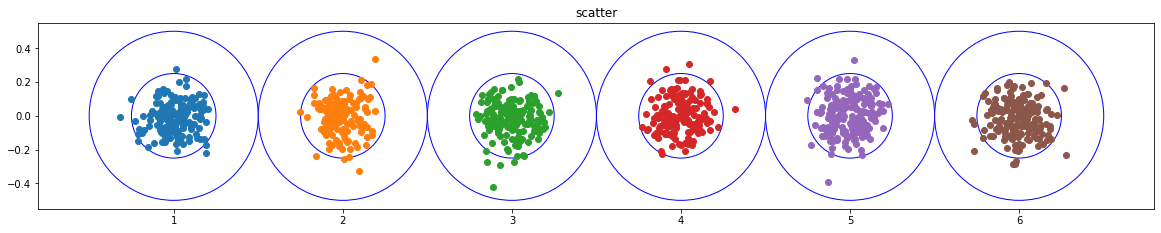

In [223]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(20, 20))
ax = plt.axes()

for k,v in enumerate(ans):
    #print(v[1])
    c = patches.Circle(xy=(v[0], 0), radius=0.5,fc='w', ec='b', zorder=1)
    c2 = patches.Circle(xy=(v[0], 0), radius=0.25,fc='w', ec='b', zorder=1)
    ax.add_patch(c)
    ax.add_patch(c2)
    x,y = v[1].T
    #print(x,y)
    plt.scatter(x, y, zorder=2)

plt.axis('scaled')

plt.title("scatter")
plt.show()

# 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。


《ヒント》


ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。



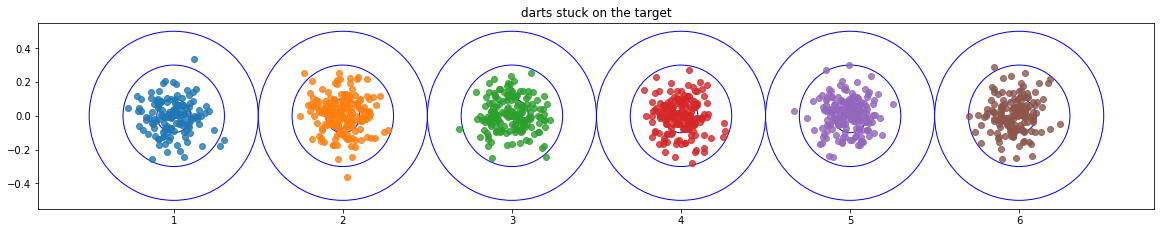

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def darts_on_target(target, darts): # 的の数とダーツの本数から自動で描写する関数
    ans_dict = {}
    target_list = list(range(1, target+1))
    for i in range(darts):
        t = np.random.choice(target_list)
        mean = [t, 0]
        cov=[[0.01,0],[0,0.01]]
        element = np.random.multivariate_normal(mean, cov, 1)
        if t not in ans_dict.keys():
            ans_dict[t] = element
        else:
            ans_dict[t] = np.concatenate([ans_dict[t], element])

    ans = sorted(ans_dict.items())
    #print(ans)
    
    fig = plt.figure(figsize=(20, 20))
    ax = plt.axes()

    for k,v in enumerate(ans):
        #print(v[1])
        c = patches.Circle(xy=(v[0], 0), radius=0.5,fc='w', ec='b', zorder=1)
        c2 = patches.Circle(xy=(v[0], 0), radius=0.3,fc='w', ec='b', zorder=1)
        c3 = patches.Circle(xy=(v[0], 0), radius=0.1,fc='w', ec='b', zorder=1)
        ax.add_patch(c)
        ax.add_patch(c2)
        ax.add_patch(c3)
        x,y = v[1].T
        #print(x,y)
        plt.scatter(x, y, zorder=2, alpha=0.8)

    plt.axis('scaled')
    plt.title("darts stuck on the target")
    return plt.show()


# 実行
darts_on_target(6, 1000)